In [1]:
# Importing the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import stats
from scipy.stats import t as t 
from scipy.optimize import curve_fit
from scipy.constants import *

from uncertainties import *
from uncertainties.umath import *

In [2]:
# Reading data
data = pd.read_csv('data/data.csv')

In [3]:
data

,I_f,U_a,U_a_2,y_1,y_2,I_v_1,Y_1,I_v_2,Y_2
0,72.1,1.50,1.5,14.5,19.0,83.3,20.0,81.9,16.8
1,73.3,1.55,1.6,14.0,18.4,73.4,17.0,70.8,14.4
2,74.5,1.60,1.7,13.7,17.7,64.6,14.7,64.0,12.9
3,75.9,1.65,1.8,13.3,17.0,57.3,13.0,58.5,11.7
4,76.3,1.70,1.9,13.0,16.4,48.2,10.2,48.4,9.2
5,78.1,1.75,2.0,12.5,16.0,36.9,8.2,36.0,7.0
6,81.3,1.80,NaN,NaN,NaN,27.5,6.0,27.0,5.2
7,83.2,1.85,NaN,NaN,NaN,18.0,3.9,18.1,13.4
8,85.5,1.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,86.3,1.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Constants and values
r = 0.02 #m
n = 1000 #turns

I_v_1 = 48.6 
I_v_2 = 77.3

U_a_1 = 1.6
U_a_2 = 2

def uncert(data_input, uncert_inst):
    t_coeff = t.ppf((1 + 0.6827)/2, len(data_input)-1)
    return np.sqrt((np.std(data_input)/np.sqrt(len(data_input)))**2 + uncert_inst**2)*t_coeff

In [5]:
#Canculation
data['U_a'] = data['U_a']*10**3
data['I_f'] = data['I_f']*10**(-3)

In [6]:
# Linear regression for U_a = f(I_f^2)
slope, intercept, r_value, p_value, std_err = stats.linregress(data['I_f']**2, data['U_a'])
print(ufloat(slope, std_err))

f = 98 * r * ufloat(slope, std_err) / (n**2)
print(f'f = {f} m')

#Best fit line 
f_fit = slope * np.array(data['I_f']**2) + intercept

(1.84+/-0.10)e+05
f = 0.361+/-0.020 m


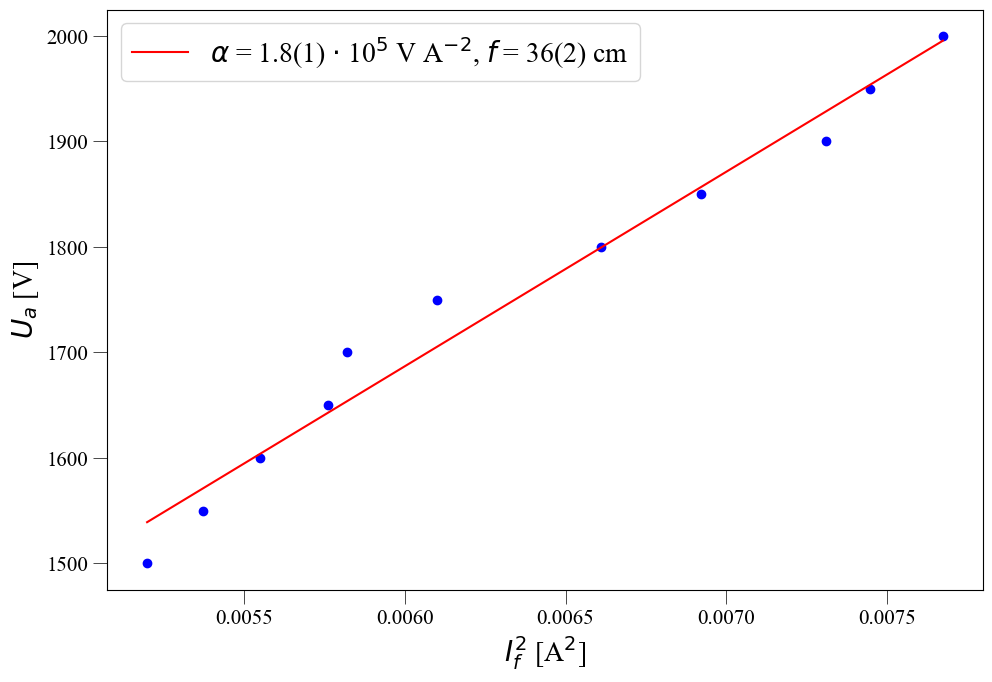

In [7]:
# Plot for focus distance
ax_l_size = 20
l_size = 15

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 7))

# ax.title.set_fontsize(ax_l_size)
ax.set_xlabel(r"$I_f^2$ [A$^2$]")
ax.xaxis.label.set_fontsize(ax_l_size)
ax.set_ylabel(r"$U_a$ [V]")
ax.yaxis.label.set_fontsize(ax_l_size)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=l_size)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=l_size)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(data['I_f']**2, data['U_a'], color='blue')
ax.plot(data['I_f']**2, f_fit, color='red', label=r'$\alpha$ = 1.8(1) $\cdot$ 10$^5$ V A$^{-2}$, $f$ = 36(2) cm')

ax.legend(loc='upper left', fontsize=20)


plt.show() 

fig.savefig('images/ohn.png', bbox_inches='tight')

In [8]:
# Linear regression for y = f(U_a^(-1/2)), I_v = 48.6 A
slope, intercept, r_value, p_value, std_err = stats.linregress(data['U_a_2'][0:5]**(-1/2), data['y_1'][0:5])
alpha_1 = ufloat(slope, std_err)
print(f'alpha_1 = {alpha_1} cm kV^(1/2)')

#Best fit line 
alpha_1_fit = slope * np.array(data['U_a_2'][0:5]**(-1/2)) + intercept

# Linear regression for y = f(U_a^(-1/2)), I_v = 77.3 A
slope, intercept, r_value, p_value, std_err = stats.linregress(data['U_a_2'][0:5]**(-1/2), data['y_2'][0:5])
alpha_2 = ufloat(slope, std_err)
print(f'alpha_2 = {alpha_2} cm kV^(1/2)')

#Best fit line
alpha_2_fit = slope * np.array(data['U_a_2'][0:5]**(-1/2)) + intercept


alpha_1 = 16.3+/-0.6 cm kV^(1/2)
alpha_2 = 29.0+/-1.0 cm kV^(1/2)


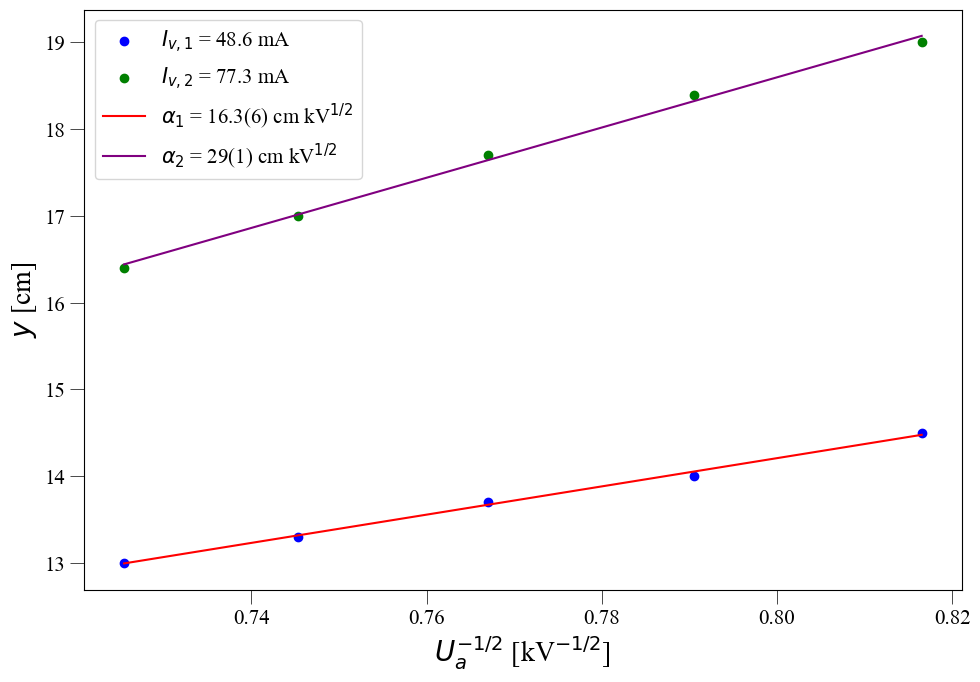

In [9]:
# Plot for y = f(U_a^(-1/2))
plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 7))

# ax.title.set_fontsize(ax_l_size)
ax.set_xlabel(r"$U_a^{-1/2}$ [kV$^{-1/2}$]")
ax.xaxis.label.set_fontsize(ax_l_size)
ax.set_ylabel(r"$y$ [cm]")
ax.yaxis.label.set_fontsize(ax_l_size)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=l_size)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=l_size)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(data['U_a_2'][0:5]**(-1/2), data['y_1'][0:5], color='blue', label='$I_{v,1}$ = 48.6 mA')
ax.scatter(data['U_a_2'][0:5]**(-1/2), data['y_2'][0:5], color='green', label='$I_{v,2}$ = 77.3 mA')
ax.plot(data['U_a_2'][0:5]**(-1/2), alpha_1_fit, color='red', label=r'$\alpha_1$ = 16.3(6) cm kV$^{1/2}$')
ax.plot(data['U_a_2'][0:5]**(-1/2), alpha_2_fit, color='purple', label=r'$\alpha_2$ = 29(1) cm kV$^{1/2}$')

ax.legend(loc='upper left', fontsize=15)

plt.show() 

fig.savefig('images/u_v.png', bbox_inches='tight')

In [10]:
# Linear regression for y = f(I_v)), U_a = 1.6 V
slope, intercept, r_value, p_value, std_err = stats.linregress(data['I_v_1'][0:7], data['Y_1'][0:7])
alpha_1 = ufloat(slope, std_err)
print(f'alpha_1 = {alpha_1} cm/mA')

#Best fit line
alpha_1_fit = slope * np.array(data['I_v_1'][0:7]) + intercept

# Linear regression for y = f(I_v)), U_a = 2 V
slope, intercept, r_value, p_value, std_err = stats.linregress(data['I_v_2'][0:7], data['Y_2'][0:7])
alpha_2 = ufloat(slope, std_err)
print(f'alpha_2 = {alpha_2} cm/mA')

#Best fit line
alpha_2_fit = slope * np.array(data['I_v_2'][0:7]) + intercept

alpha_1 = 0.249+/-0.008 cm/mA
alpha_2 = 0.213+/-0.004 cm/mA


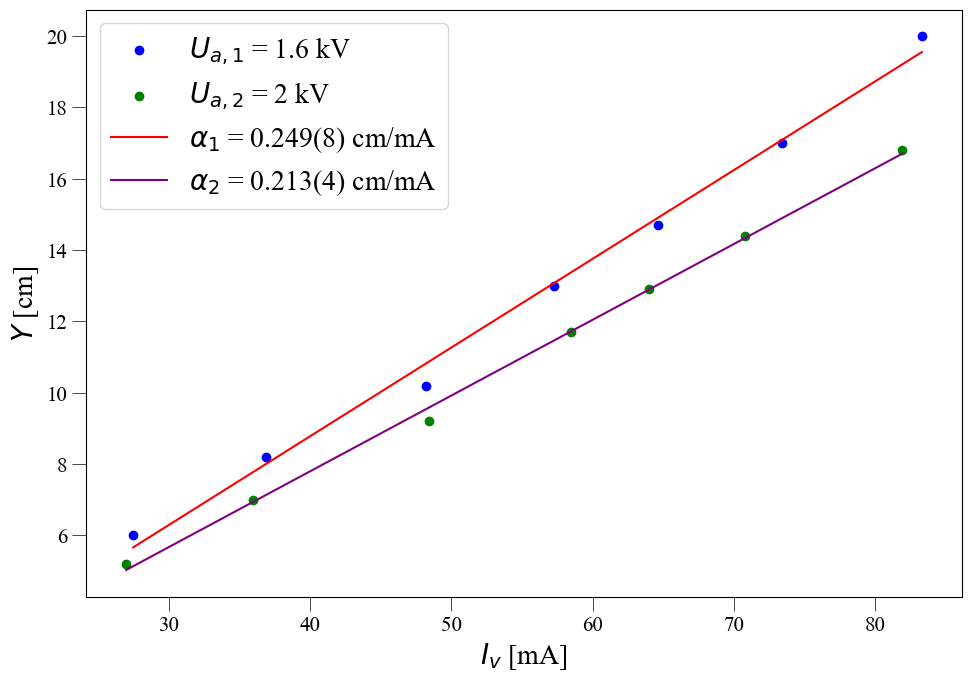

In [11]:
# Plot for y = f(I_v)

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 7))

# ax.title.set_fontsize(ax_l_size)
ax.set_xlabel(r"$I_v$ [mA]")
ax.xaxis.label.set_fontsize(ax_l_size)
ax.set_ylabel(r"$Y$ [cm]")
ax.yaxis.label.set_fontsize(ax_l_size)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=l_size)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=l_size)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(data['I_v_1'][0:7], data['Y_1'][0:7], color='blue', label='$U_{a,1}$ = 1.6 kV')
ax.scatter(data['I_v_2'][0:7], data['Y_2'][0:7], color='green', label='$U_{a,2}$ = 2 kV')
ax.plot(data['I_v_1'][0:7], alpha_1_fit, color='red', label=r'$\alpha_1$ = 0.249(8) cm/mA')
ax.plot(data['I_v_2'][0:7], alpha_2_fit, color='purple', label=r'$\alpha_2$ = 0.213(4) cm/mA')

ax.legend(loc='upper left', fontsize=20)

plt.show() 

fig.savefig('images/I_v.png', bbox_inches='tight')